In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
path=r'C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Data Immersion\Achievement 6'

In [3]:
df=pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'crime_demo_merged.csv'), index_col=False)

In [5]:
#checking for updated matplotlib
matplotlib.__version__

'3.8.4'

In [6]:
df.columns

Index(['Unnamed: 0', 'incident_id', 'offense_id', 'offense_code',
       'offense_code_extension', 'offense_type_id', 'offense_type_name',
       'offense_category_id', 'first_occurrence_date', 'last_occurrence_date',
       ...
       'Latin America FB', 'Carribean FB', 'Central America FB',
       'South America FB', 'North America FB', 'Percent Living in Poverty',
       'Percent Families in Poverty', 'GlobalID', 'Shape__Area',
       'Shape__Length'],
      dtype='object', length=169)

In [7]:
df.head()

,Unnamed: 0,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_type_name,offense_category_id,first_occurrence_date,last_occurrence_date,...,Latin America FB,Carribean FB,Central America FB,South America FB,North America FB,Percent Living in Poverty,Percent Families in Poverty,GlobalID,Shape__Area,Shape__Length
0,0,2.022749e+08,2.020000e+14,2999,0,criminal-mischief-other,Criminal mischief - other,public-disorder,2/12/2022 22:45,2/13/2022 8:00,...,11,0,11,0,0,0.0,0.0,578ee93f-c666-4afb-a5da-464a0e1ce408,17995417.42,17705.43233
1,1,2.020529e+09,2.020000e+15,2999,0,criminal-mischief-other,Criminal mischief - other,public-disorder,9/1/2020 15:30,9/1/2020 15:30,...,1637,0,1637,0,0,18.4,16.9,e08a87f1-5d62-4f3c-9c82-fe2177912601,43089441.09,27352.42330
2,2,2.019905e+06,2.020000e+12,2999,0,criminal-mischief-other,Criminal mischief - other,public-disorder,12/31/2018 21:30,NaN,...,1637,0,1637,0,0,18.4,16.9,e08a87f1-5d62-4f3c-9c82-fe2177912601,43089441.09,27352.42330
3,3,2.022261e+09,2.020000e+15,2999,0,criminal-mischief-other,Criminal mischief - other,public-disorder,5/24/2022 21:10,NaN,...,1637,0,1637,0,0,18.4,16.9,e08a87f1-5d62-4f3c-9c82-fe2177912601,43089441.09,27352.42330
4,4,2.022432e+09,2.020000e+15,2999,0,criminal-mischief-other,Criminal mischief - other,public-disorder,8/22/2022 22:45,NaN,...,1637,0,1637,0,0,18.4,16.9,e08a87f1-5d62-4f3c-9c82-fe2177912601,43089441.09,27352.42330


In [8]:
df.isnull().sum()

Unnamed: 0                     0
incident_id                    0
offense_id                     0
offense_code                   0
offense_code_extension         0
                              ..
Percent Living in Poverty      0
Percent Families in Poverty    0
GlobalID                       0
Shape__Area                    0
Shape__Length                  0
Length: 169, dtype: int64

In [9]:
#checking for duplicates
df_dups=df[df.duplicated()]

In [10]:
#no duplicate values.
df_dups.shape

(0, 169)

In [12]:
#creating a subset with the columns I want to correlate
sub=df[['victim_count', 'Total Population All', 'MALE', 'FEMALE', 'Less Than HS Diploma', 'Median Household Income', 'Foreign Born FB']]

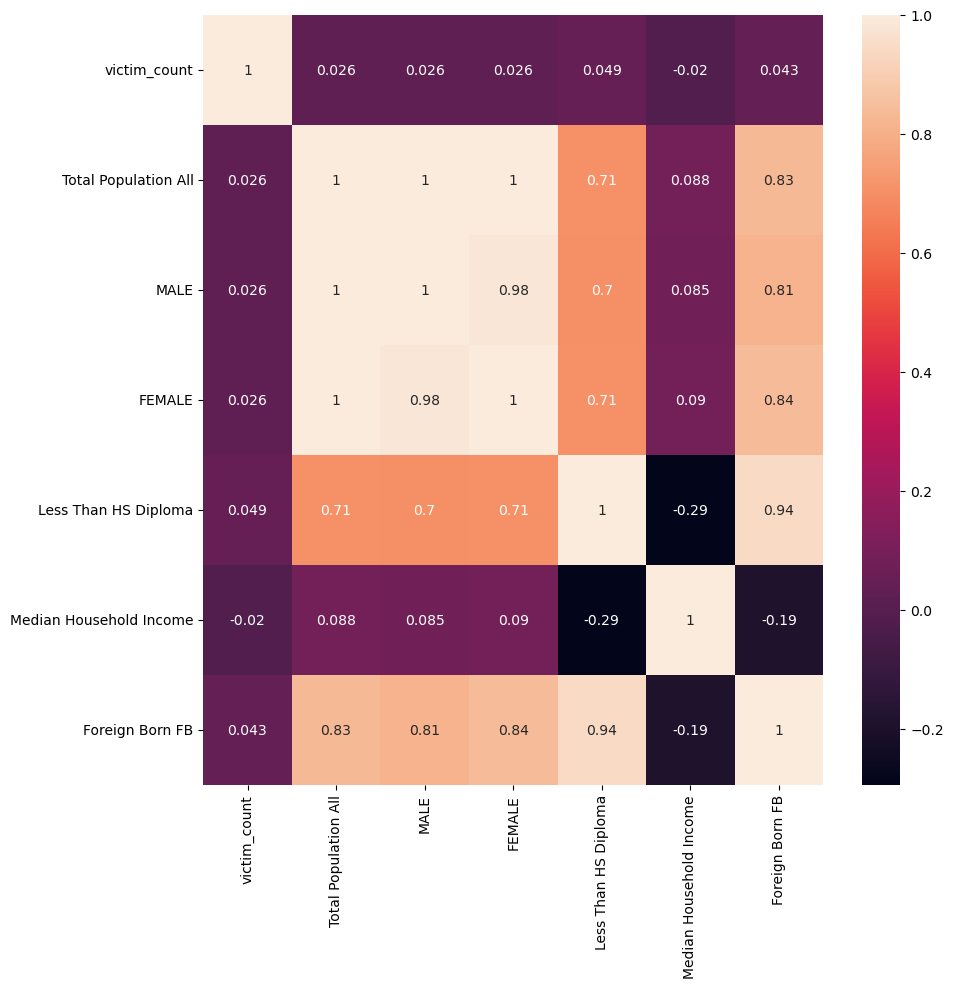

In [13]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [ ]:
#a lot of these correlations make intuitive sense when you think more about them.
#for example, having a higher total population, or having higher male or female populations will also increase the number of people in that area who are foreign born, who have less than a HS diploma, etc.
#making this made me realize the difficulty I may have with this dataset; I don't have any columns denoting frequency or severity of crimes in any objective way; deriving those columsn to then run a correlation matrix may lead to more interesting findings.

In [16]:
# Step 1: Calculate the total number of crimes per neighborhood
crime_counts = df['Neighborhood Name'].value_counts().reset_index()
crime_counts.columns = ['Neighborhood Name', 'crime_count']

# Step 2: Calculate the total number of victims per neighborhood
victim_counts = df.groupby('Neighborhood Name')['victim_count'].sum().reset_index()
victim_counts.columns = ['Neighborhood Name', 'total_victims']

# Step 3: Merge the two DataFrames
neighborhood_stats = pd.merge(crime_counts, victim_counts, on='Neighborhood Name')

# Step 4: Normalize the values
neighborhood_stats['crime_count_norm'] = (neighborhood_stats['crime_count'] - neighborhood_stats['crime_count'].min()) / (neighborhood_stats['crime_count'].max() - neighborhood_stats['crime_count'].min())
neighborhood_stats['total_victims_norm'] = (neighborhood_stats['total_victims'] - neighborhood_stats['total_victims'].min()) / (neighborhood_stats['total_victims'].max() - neighborhood_stats['total_victims'].min())

# Step 5: Combine the normalized values to create a composite danger score
# You can adjust the weights as needed; here we give equal weight to both components
neighborhood_stats['danger_score'] = (neighborhood_stats['crime_count_norm'] + neighborhood_stats['total_victims_norm']) / 2

# Step 6: Sort by the danger score in descending order
neighborhood_stats_sorted = neighborhood_stats.sort_values(by='danger_score', ascending=False)

# Set display option to show all rows
pd.set_option('display.max_rows', None)

# Display the result
neighborhood_stats_sorted

,Neighborhood Name,crime_count,total_victims,crime_count_norm,total_victims_norm,danger_score
0,Five Points,22231,22659,1.000000,1.000000,1.000000
1,Central Park,17423,17617,0.780035,0.773739,0.776887
2,DIA,14412,14507,0.642282,0.634177,0.638229
3,CBD,14240,14461,0.634413,0.632113,0.633263
4,Capitol Hill,13993,14191,0.623113,0.619996,0.621555
5,Union Station,12099,12357,0.536463,0.537695,0.537079
6,Montbello,10842,11559,0.478955,0.501885,0.490420
7,Gateway - Green Valley Ranch,9865,10323,0.434257,0.446419,0.440338
8,Civic Center,9719,9956,0.427578,0.429950,0.428764
9,East Colfax,8378,8544,0.366227,0.366586,0.366407


In [17]:
neighborhood_stats_sorted.to_clipboard()

In [23]:
# Step 1: Calculate the total number of crimes per neighborhood
crime_counts = df['Neighborhood Name'].value_counts().reset_index()
crime_counts.columns = ['Neighborhood Name', 'crime_count']

# Step 2: Calculate the total number of victims per neighborhood
victim_counts = df.groupby('Neighborhood Name')['victim_count'].sum().reset_index()
victim_counts.columns = ['Neighborhood Name', 'total_victims']

# Step 3: Merge the two DataFrames
neighborhood_stats = pd.merge(crime_counts, victim_counts, on='Neighborhood Name')

# Step 4: Normalize the values
neighborhood_stats['crime_count_norm'] = (neighborhood_stats['crime_count'] - neighborhood_stats['crime_count'].min()) / (neighborhood_stats['crime_count'].max() - neighborhood_stats['crime_count'].min())
neighborhood_stats['total_victims_norm'] = (neighborhood_stats['total_victims'] - neighborhood_stats['total_victims'].min()) / (neighborhood_stats['total_victims'].max() - neighborhood_stats['total_victims'].min())

# Step 5: Combine the normalized values to create a composite danger score
# You can adjust the weights as needed; here we give equal weight to both components
neighborhood_stats['danger_score'] = (neighborhood_stats['crime_count_norm'] + neighborhood_stats['total_victims_norm']) / 2

# Step 6: Merge the danger score back into the original DataFrame
crimes_df = df.merge(neighborhood_stats[['Neighborhood Name', 'danger_score']], on='Neighborhood Name', how='left')

In [24]:
#creating a subset with the newly derived danger_score column
subs= crimes_df[['danger_score', 'Total Population All', 'MALE', 'FEMALE', 'Median Household Income', 'Foreign Born FB', 'Less Than HS Diploma', 'Percent Living in Poverty']]

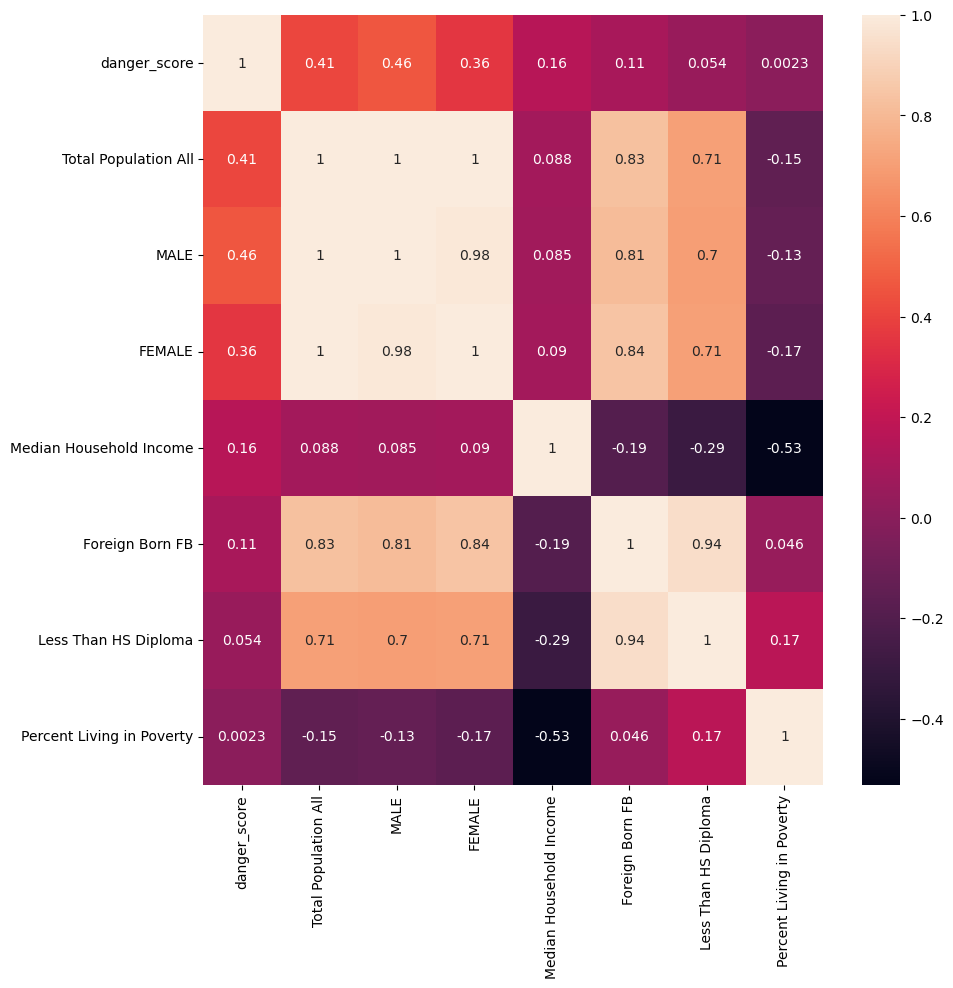

In [25]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(subs.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [33]:
corr.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'corr_heatmap.png'))

In [ ]:
#surprisingly, only 3 variables showed a moderate relationship with the danger_score: total pop, male pop, female pop. 
#I thought that education and poverty would have stronger effects on the danger_score of a given neighborhood, but I guess not.

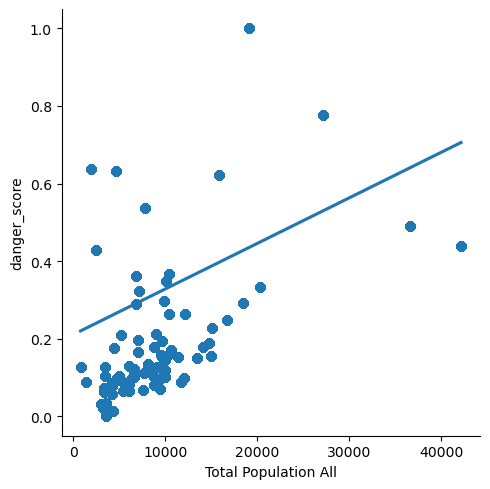

In [28]:
# Create a scatterplot for the "danger_score" and "total population all" columns in seaborn

scat=sns.lmplot(x = 'Total Population All', y = 'danger_score', data = crimes_df)

In [29]:
scat.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'scat_population_danger.png'))

In [ ]:
#there is quite a lot of variance apparent in this graph; I think what this tells us is that it only takes a few bad agaents (or even just 1) to greatly skew the danger_score of a given area. 
#while statisitically, more population=more crime makes intuitive sense, this tells us that there are other factors that can describe a significant % of the variance.

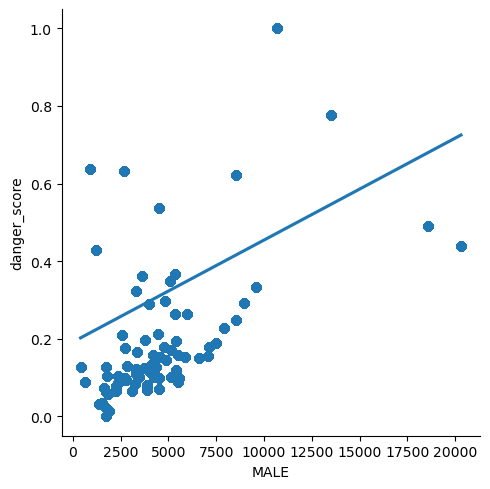

In [30]:
# Create a scatterplot for the "danger_score" and "MALE" columns in seaborn

scat1=sns.lmplot(x = 'MALE', y = 'danger_score', data = crimes_df)

In [31]:
scat1.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'scat_male_danger.png'))

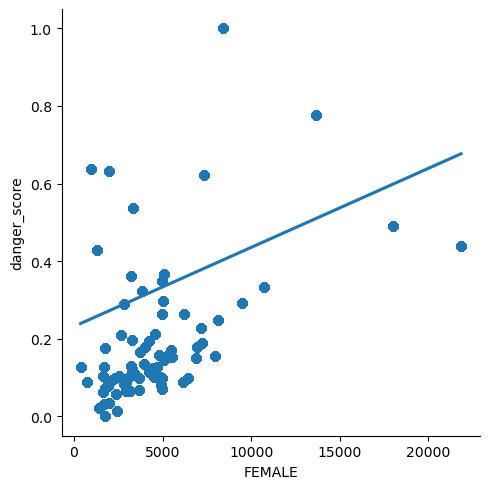

In [34]:
# Create a scatterplot for the "danger_score" and "FEMALE" columns in seaborn

scat2=sns.lmplot(x = 'FEMALE', y = 'danger_score', data = crimes_df)

In [ ]:
#all of these scatterplots have very similar distributions
#first a tight clumping of data points at the lower end
#followed by a number of outliers in terms of danger or population size

In [35]:
scat2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'scat_female_danger.png'))

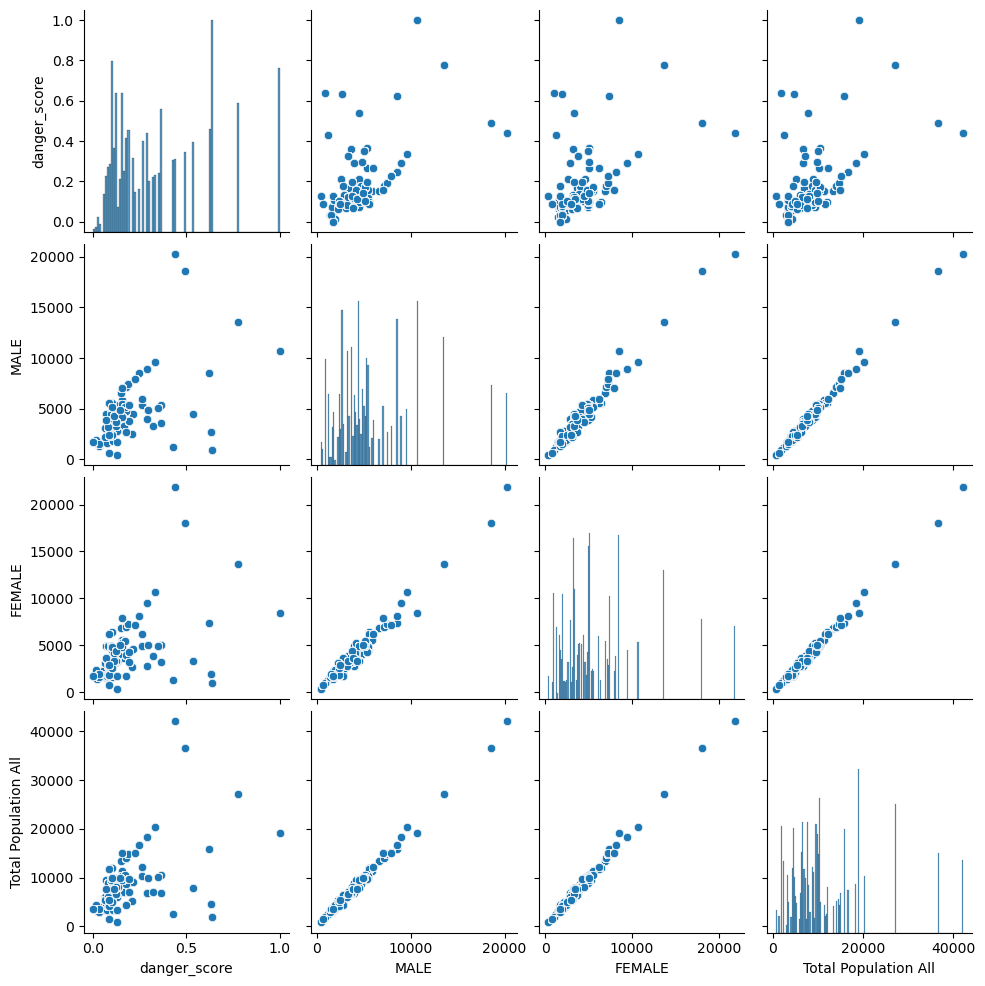

In [37]:
#creating a subset of the subset of variables that I used for the second correlation heatmpa.
subss=subs[['danger_score', 'MALE', 'FEMALE', 'Total Population All']]

# Creating a pair plot with the same set of variables from the second correlation heatmap.

g = sns.pairplot(subss)

In [38]:
g.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'pair_plot_danger.png'))

In [ ]:
#looking at these distributions, a number of them make sense
#ie, male/female and total population having close correlations
#I want to find another variable to compare with the danger_score. given my dataset has over 100 columns, there is more I can look into.

In [39]:
#creating another subset of different variables with the danger_score column
sub2= crimes_df[['danger_score', 'Non Family Household', 'Not Enrolled', 'Total Commuters', 'Vacant Housing Units', 'Household Income Less 10000', 'Per Capita Income', 'Age 20 to 29']]

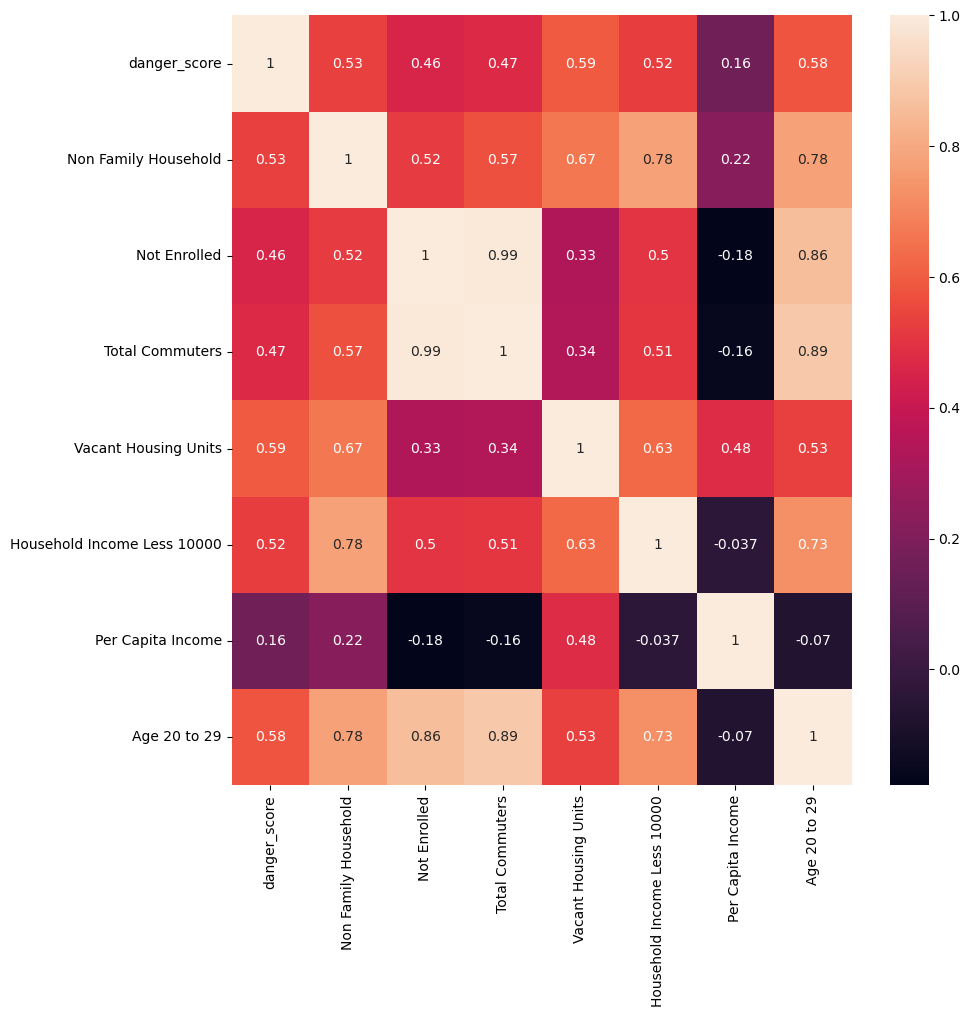

In [40]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr2 = sns.heatmap(sub2.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [41]:
corr2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'corr_heatmap_better.png'))

In [ ]:
#already this is yielding much more intriguing results. 
#the presence of people aged 20-29, total commuters, non-family households, and more people not enrolled in school is associated with more crime

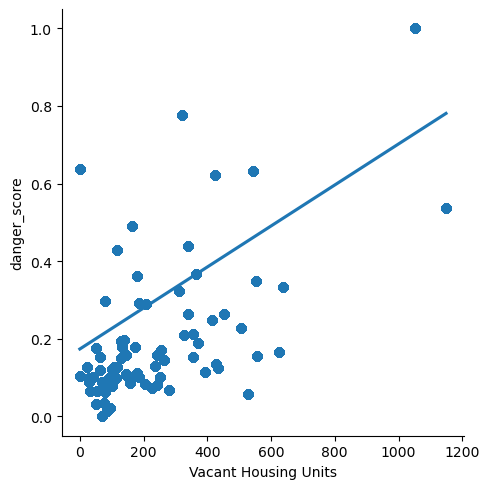

In [42]:
# Create a scatterplot for the "danger_score" and "vacant housing units" columns in seaborn

scat3=sns.lmplot(x = 'Vacant Housing Units', y = 'danger_score', data = crimes_df)

In [43]:
scat3.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'scat_danger_vacant_units.png'))

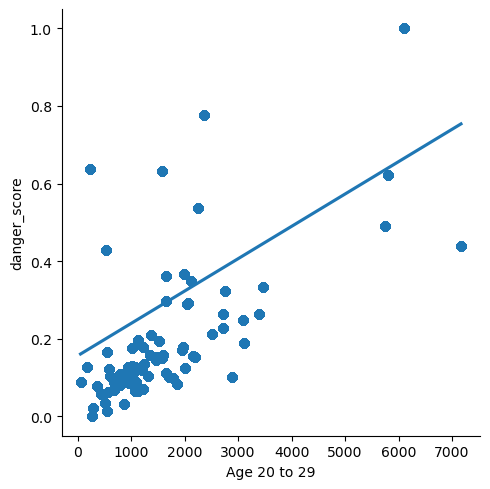

In [44]:
# Create a scatterplot for the "danger_score" and "age 20 to 29" columns in seaborn

scat4=sns.lmplot(x = 'Age 20 to 29', y = 'danger_score', data = crimes_df)

In [45]:
scat4.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'scat_danger_20_29_age.png'))

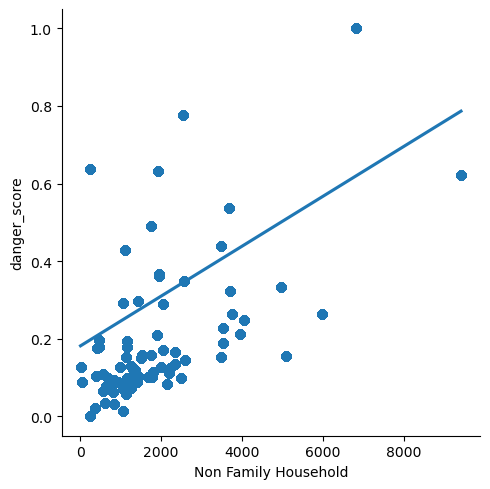

In [46]:
# Create a scatterplot for the "danger_score" and "non family household" columns in seaborn

scat5=sns.lmplot(x = 'Non Family Household', y = 'danger_score', data = crimes_df)

In [47]:
scat5.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'scat_danger_non_family_house.png'))

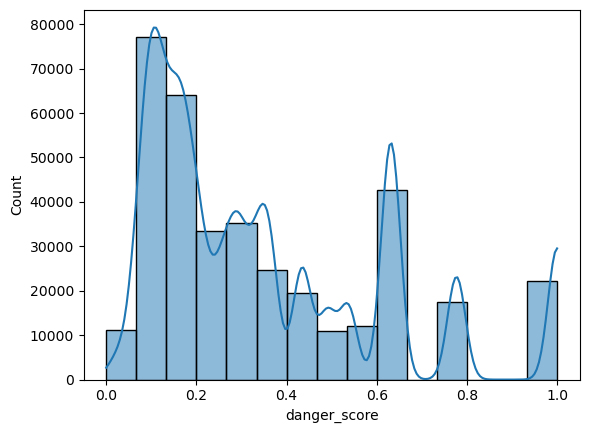

In [49]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the danger score. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

hist=sns.histplot(crimes_df['danger_score'], bins = 15, kde = True)

In [50]:
hist.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'hist_danger_score.png'))

In [55]:
crimes_df.loc[crimes_df['danger_score']< 0.2, 'Danger Category']= 'Low danger'

In [56]:
crimes_df.loc[(crimes_df['danger_score']>= 0.2) & (crimes_df['danger_score']<0.6), 'Danger Category']= 'Medium danger'

In [57]:
crimes_df.loc[crimes_df['danger_score']>= 0.6, 'Danger Category']= 'High danger'

In [58]:
crimes_df['Danger Category'].value_counts(dropna=False)

Danger Category
Low danger       152192
Medium danger    136000
High danger       82299
Name: count, dtype: int64

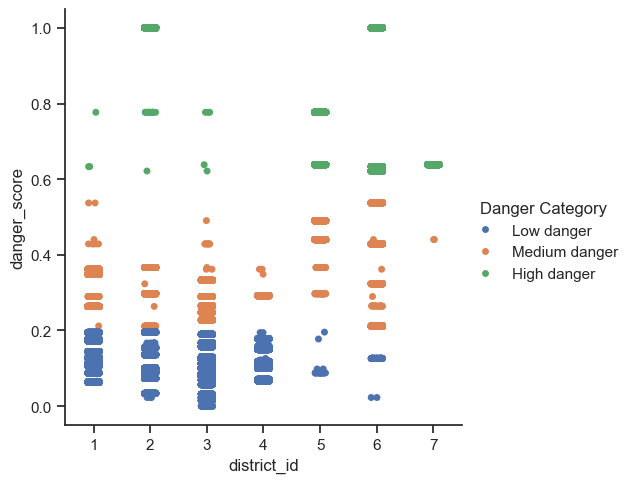

In [59]:
# Create a categorical plot in seaborn using the danger categories created above

sns.set(style="ticks")
g2 = sns.catplot(x="district_id", y="danger_score", hue="Danger Category", data=crimes_df)

In [60]:
g2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'catplot_danger_by_district.png'))

In [ ]:
#I wanted to use district id to plot the danger scores against since there are only 7 police districts in denver
#this shows that district 4 is the safest, since it does not have any high danger incidences
#district 7 has far fewer instances but they're only medium to high danger- I wonder why?
#districts 2 and 6 see the highest danger score of 1

In [ ]:
#so far I can start to see that the younger, less educated, lower income demographic tends to be involved with more crime, per my correlation heatmap.
#based on calculating the danger scores for each neighborhood, I can answer the "which neighborhoods are safest" question

In [61]:
#exporting derived df
crimes_df.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'crimes_derived.csv'))